In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import * 
from sklearn.linear_model import * 
from sklearn.tree import *
from sklearn.ensemble import * 


In [2]:
d = pd.read_csv('smoking.csv',skipinitialspace = True)
d.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
d.duplicated().sum()

0

In [4]:
d.drop(columns=['ID','oral'], inplace = True)

In [5]:
d.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [6]:
d.shape

(55692, 25)

In [7]:
d.size

1392300

In [8]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.004830,9.679278,40.0,70.0,76.0,82.0,146.0


In [9]:
d.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

# Data Visualisation

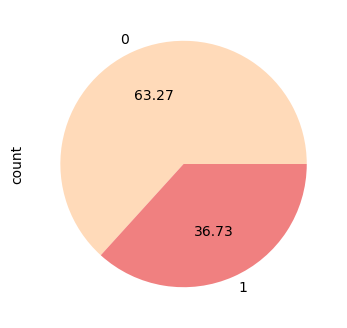

In [12]:
plt.figure(figsize=(5,4))
custom_colors = ['#FFDAB9', '#F08080', '#FFEBCD', '#FFA07A', '#FFE4B5']
d['smoking'].value_counts().plot.pie(autopct = '%.2f', colors = custom_colors)
plt.show()

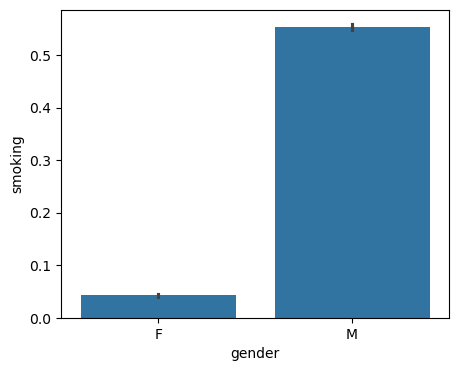

In [13]:
plt.figure(figsize=(5,4))
sns.barplot(x = d['gender'], y =d['smoking'])
plt.show()

<Axes: xlabel='gender', ylabel='count'>

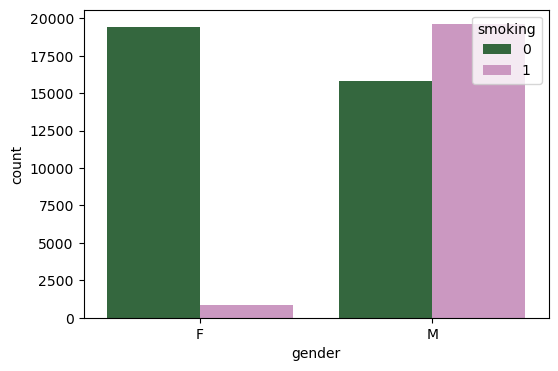

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='smoking', data=d, palette = 'cubehelix')


<Axes: xlabel='age', ylabel='Count'>

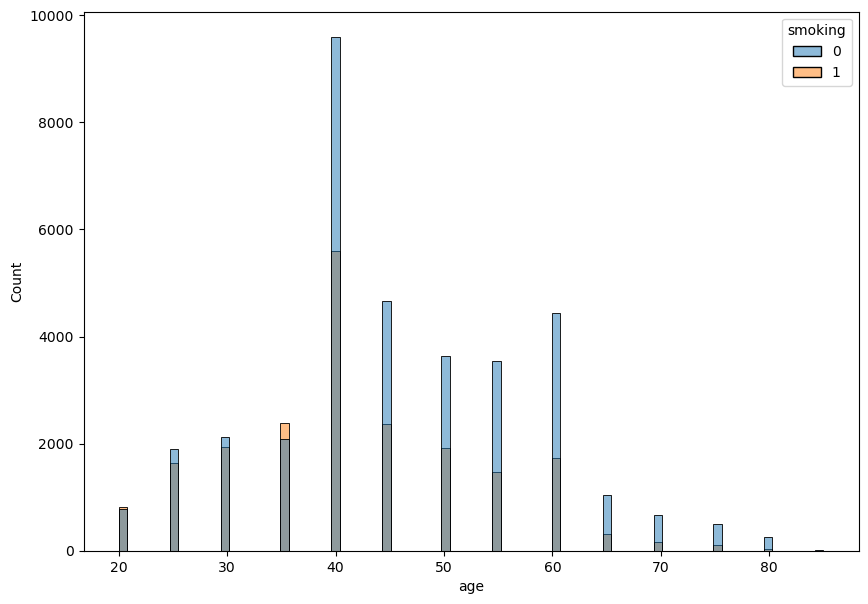

In [15]:
plt.figure(figsize=(10,7))
sns.histplot(x=d['age'], hue=d['smoking'])

# Outliers

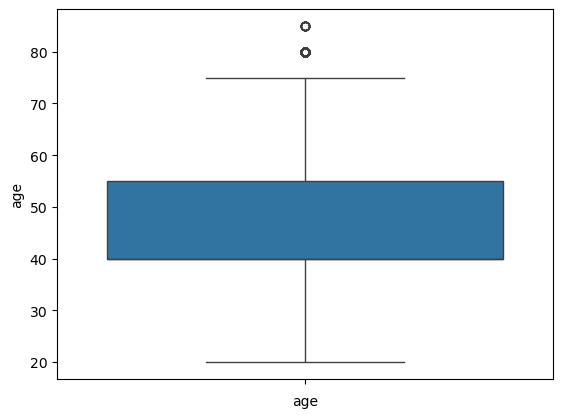

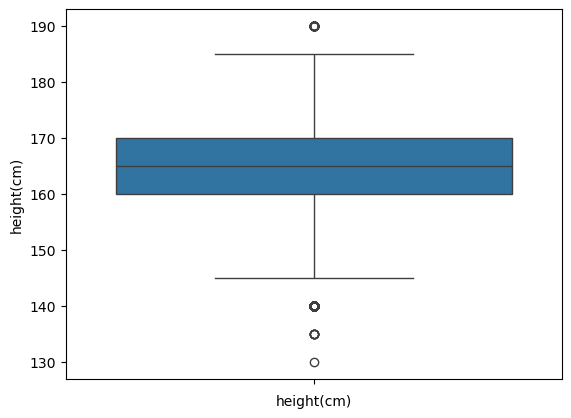

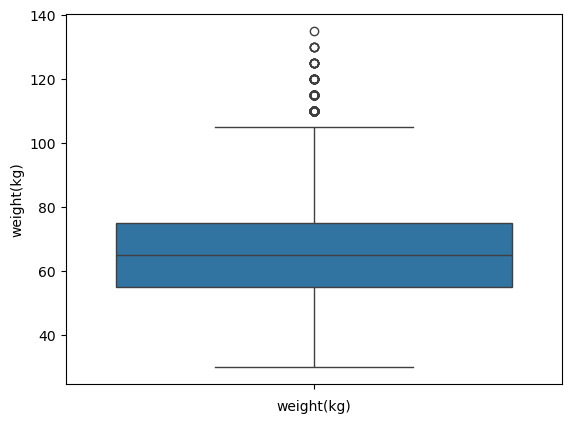

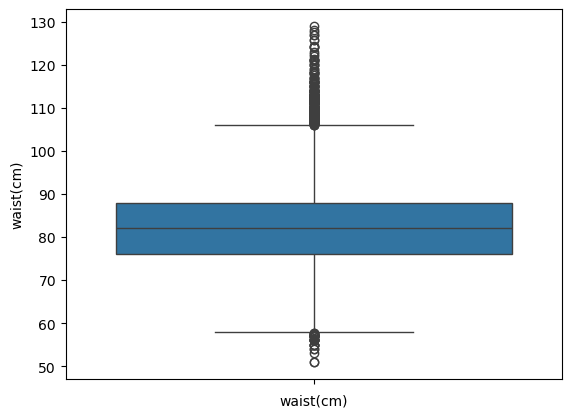

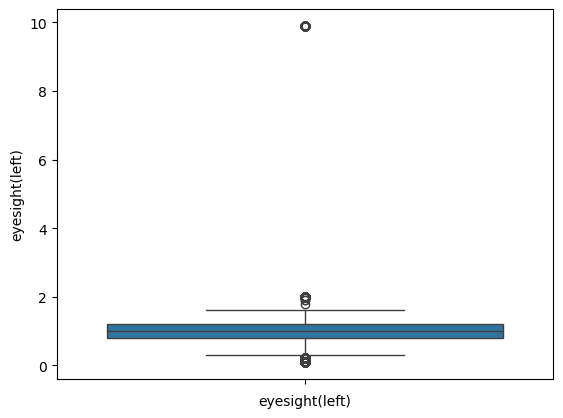

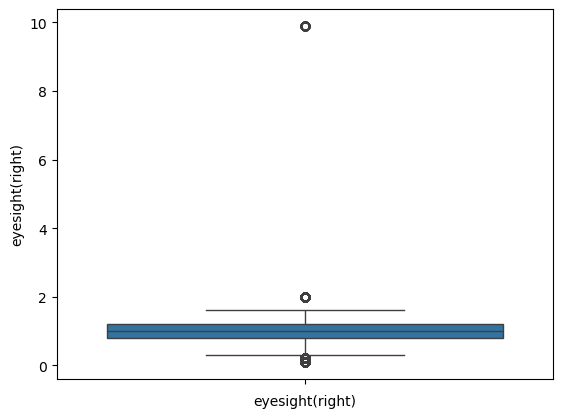

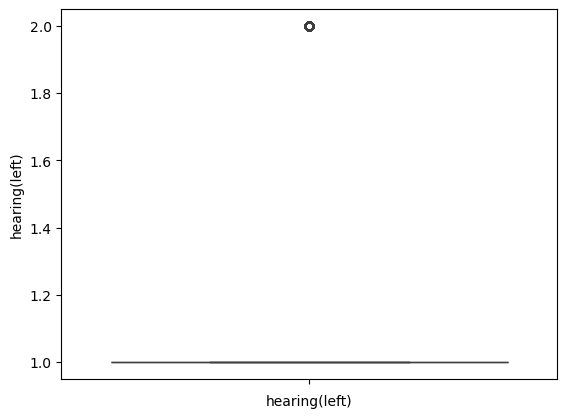

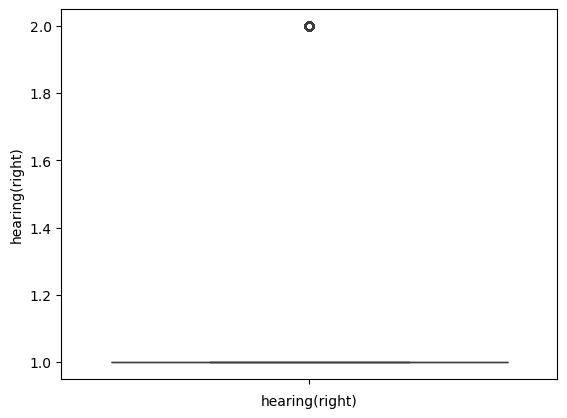

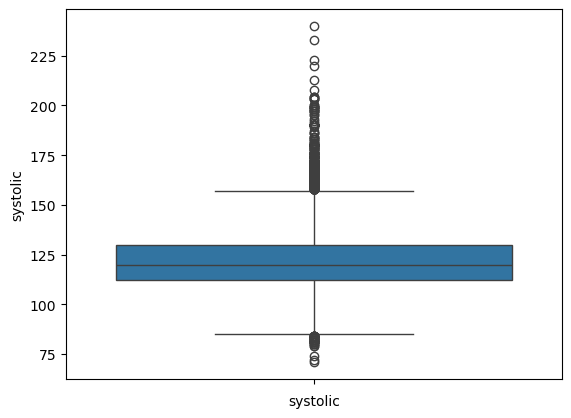

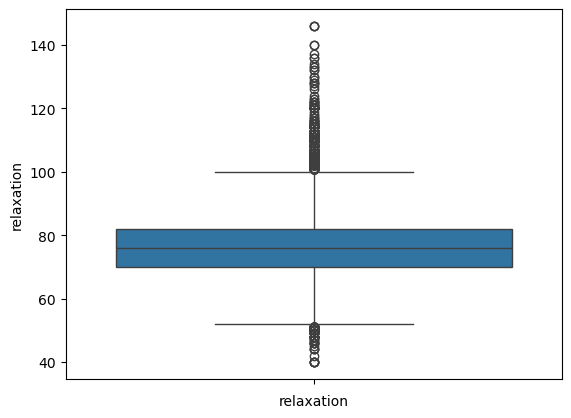

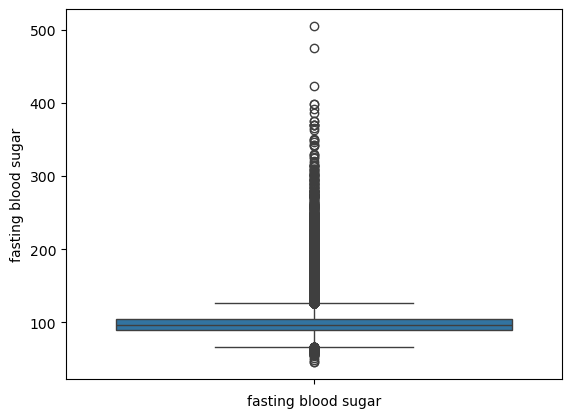

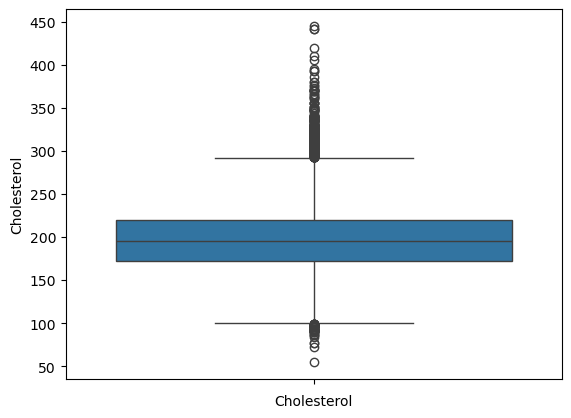

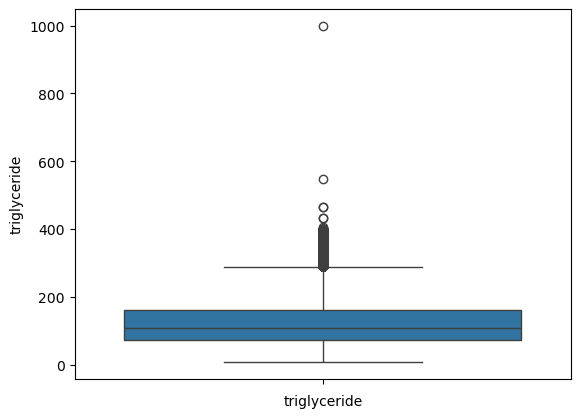

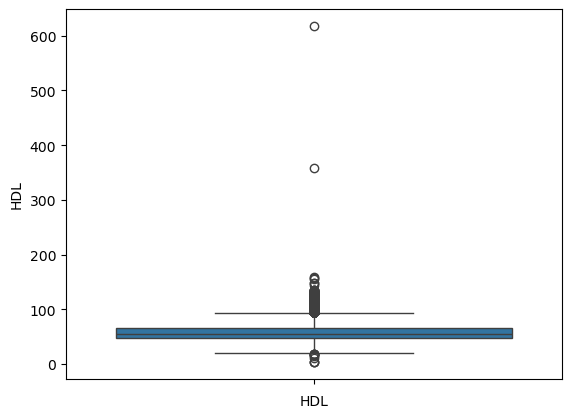

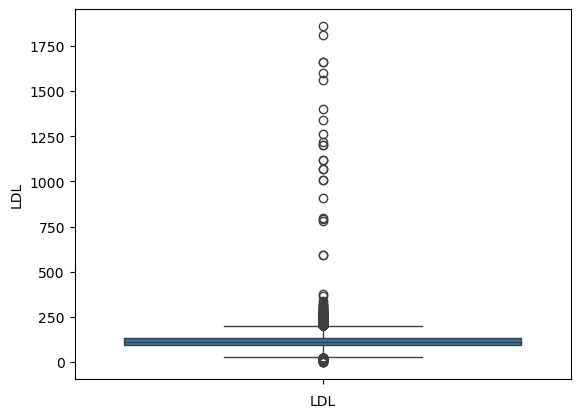

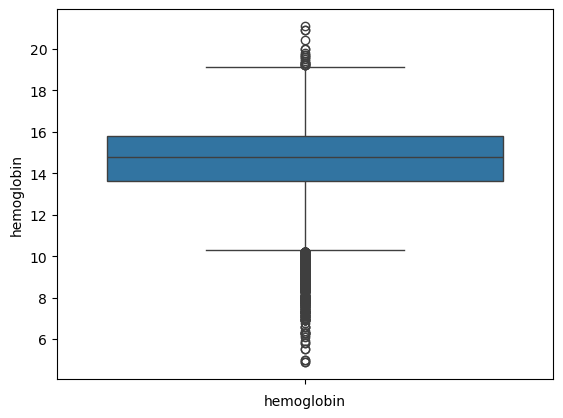

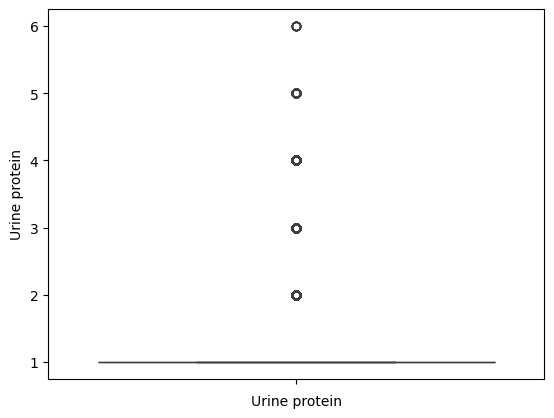

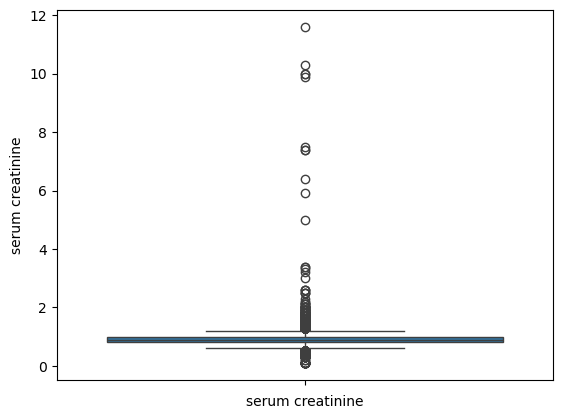

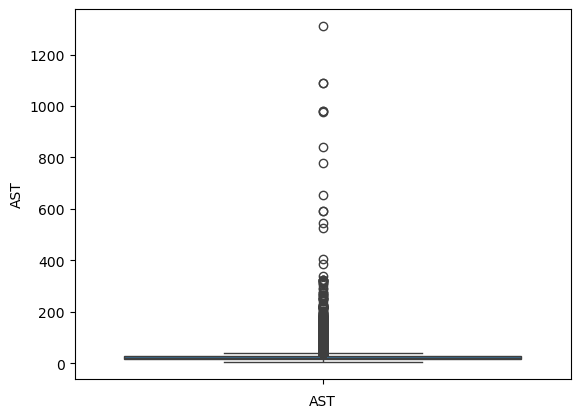

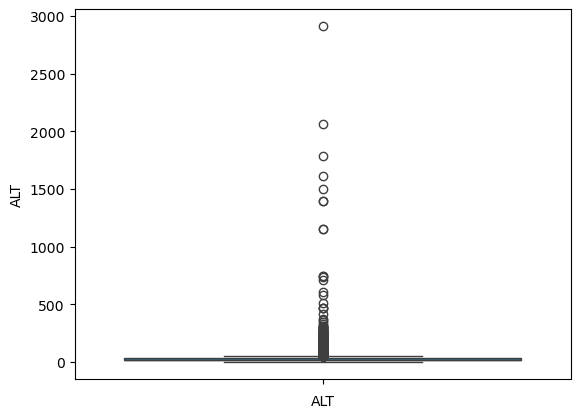

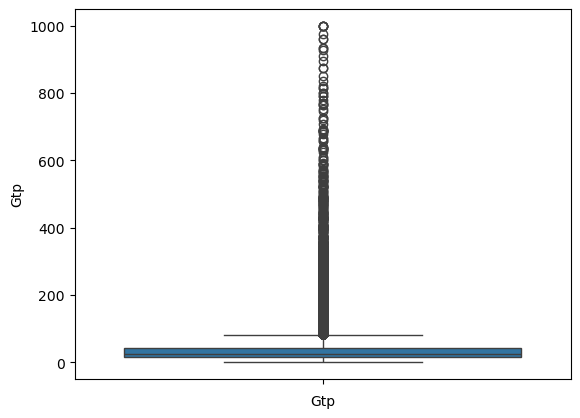

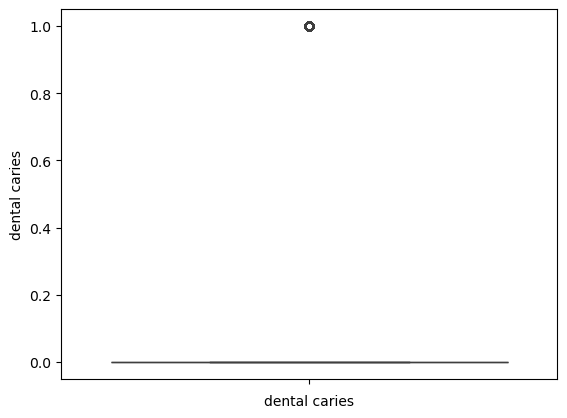

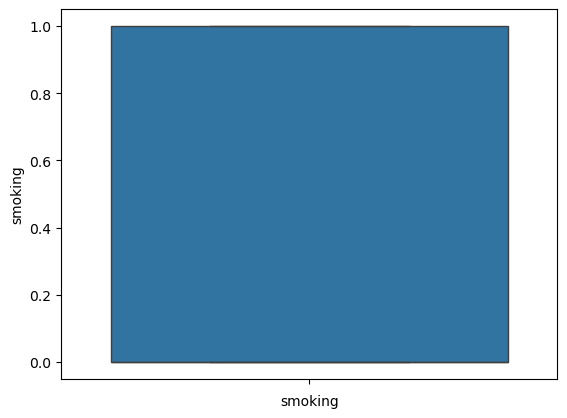

In [17]:
for i in d.columns:
    if (d[i].dtype == 'int64') or (d[i].dtype == 'float64'):
        sns.boxplot(d[i])
        plt.xlabel(i)
        plt.show()

In [18]:
d.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [19]:
le = LabelEncoder()
d['gender']= le.fit_transform(d['gender'])
d['tartar']= le.fit_transform(d['tartar'])
d['dental caries']= le.fit_transform(d['dental caries'])

# Feature Selection

In [21]:
x = d.iloc[:,:-1]
y = d['smoking']

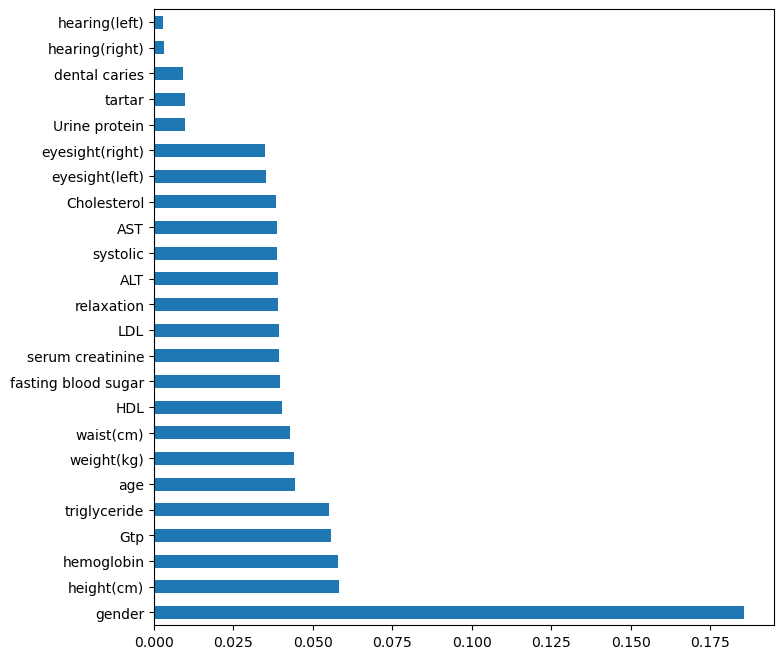

In [22]:
m = ExtraTreesClassifier()
m.fit(x,y)
df1 = pd.Series(m.feature_importances_,index = x.columns)
plt.figure(figsize=(8,8))
df1.nlargest(24).plot(kind = 'barh')
plt.show()

In [23]:
df1.sort_values(ascending=False).index.tolist()

['gender',
 'height(cm)',
 'hemoglobin',
 'Gtp',
 'triglyceride',
 'age',
 'weight(kg)',
 'waist(cm)',
 'HDL',
 'fasting blood sugar',
 'serum creatinine',
 'LDL',
 'relaxation',
 'ALT',
 'systolic',
 'AST',
 'Cholesterol',
 'eyesight(left)',
 'eyesight(right)',
 'Urine protein',
 'tartar',
 'dental caries',
 'hearing(right)',
 'hearing(left)']

## 

In [25]:
x = d[['gender',
 'hemoglobin',
 'height(cm)',
 'Gtp',
 'triglyceride',
 'weight(kg)',
 'age',
 'waist(cm)',
 'HDL',
 'fasting blood sugar',
 'LDL',
 'systolic',
 'ALT',
 'relaxation',
 'AST',
 'Cholesterol',
 'serum creatinine']]
y = d['smoking']


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 31)

In [27]:
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
lor = LogisticRegression()
lor.fit(x_train,y_train)
y_perd = lor.predict(x_test)

In [28]:
accuracy_score(y_test,y_perd)*100

74.67456683723853

In [29]:
classification_report(y_test,y_perd)

'              precision    recall  f1-score   support\n\n           0       0.82      0.77      0.79      7040\n           1       0.64      0.70      0.67      4099\n\n    accuracy                           0.75     11139\n   macro avg       0.73      0.74      0.73     11139\nweighted avg       0.75      0.75      0.75     11139\n'

<Axes: xlabel='smoking', ylabel='Density'>

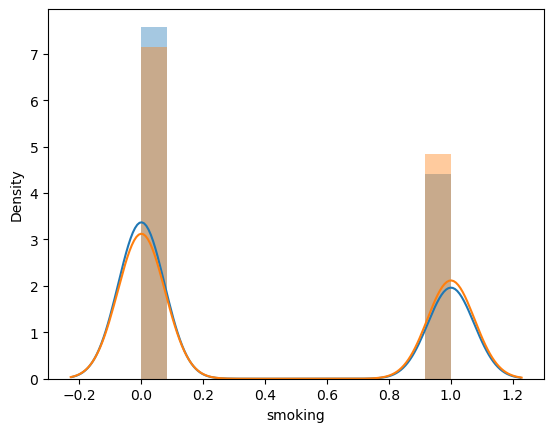

In [30]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_perd,label = 'predicted')

# Decision Tree

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)

In [33]:
accuracy_score(y_test,y_preddt)*100

78.02316186372205

In [34]:
classification_report(y_test,y_preddt)

'              precision    recall  f1-score   support\n\n           0       0.83      0.82      0.83      7040\n           1       0.70      0.70      0.70      4099\n\n    accuracy                           0.78     11139\n   macro avg       0.76      0.76      0.76     11139\nweighted avg       0.78      0.78      0.78     11139\n'

<Axes: xlabel='smoking', ylabel='Density'>

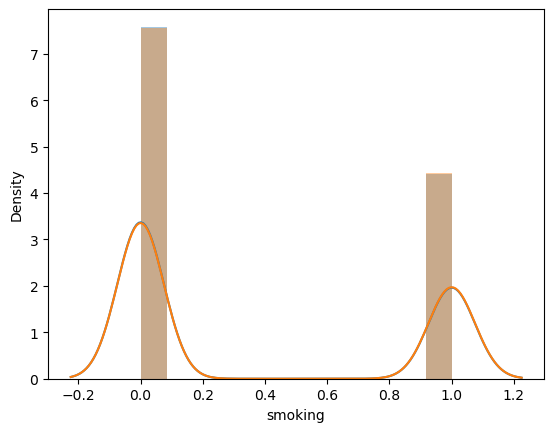

In [35]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_preddt,label = 'predicted')

# Bagging Classifier

In [37]:
bg = BaggingClassifier(estimator = DecisionTreeClassifier(),n_estimators = 1000)
bg.fit(x_train,y_train).score(x_test,y_test)
y_predbg = bg.predict(x_test)

In [38]:
accuracy_score(y_test,y_predbg)*100

83.44555166532005

<Axes: xlabel='smoking', ylabel='Density'>

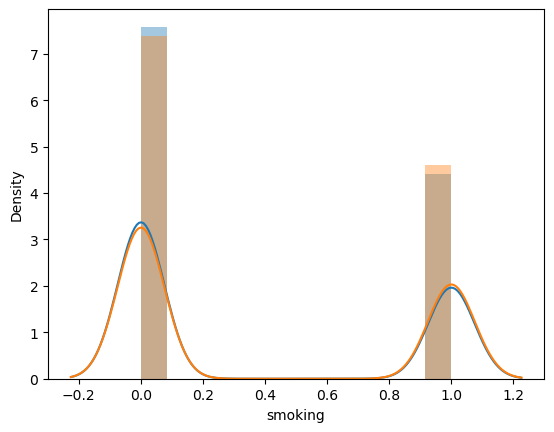

In [39]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_predbg,label = 'predicted')

# Bagging Algorithm = Extra Trees

In [41]:
et = ExtraTreesClassifier(n_estimators = 1000, random_state = 31)
et.fit(x_train,y_train)
y_predet = et.predict(x_test)
accuracy_score(y_test,y_predet)*100

83.4814615315558

In [42]:
classification_report(y_test,y_predet)

'              precision    recall  f1-score   support\n\n           0       0.89      0.85      0.87      7040\n           1       0.76      0.81      0.78      4099\n\n    accuracy                           0.83     11139\n   macro avg       0.82      0.83      0.82     11139\nweighted avg       0.84      0.83      0.84     11139\n'

<Axes: xlabel='smoking', ylabel='Density'>

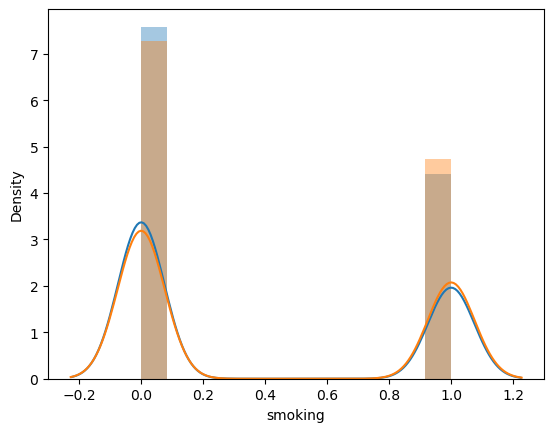

In [43]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_predet,label = 'predicted')

# Bagging Algorithm - Random forest

In [45]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 31)
rf.fit(x_train,y_train)
y_predrf = rf.predict(x_test)
accuracy_score(y_test,y_predrf)*100

83.68794326241135

In [46]:
classification_report(y_test,y_predrf)

'              precision    recall  f1-score   support\n\n           0       0.88      0.86      0.87      7040\n           1       0.77      0.80      0.78      4099\n\n    accuracy                           0.84     11139\n   macro avg       0.82      0.83      0.83     11139\nweighted avg       0.84      0.84      0.84     11139\n'

<Axes: xlabel='smoking', ylabel='Density'>

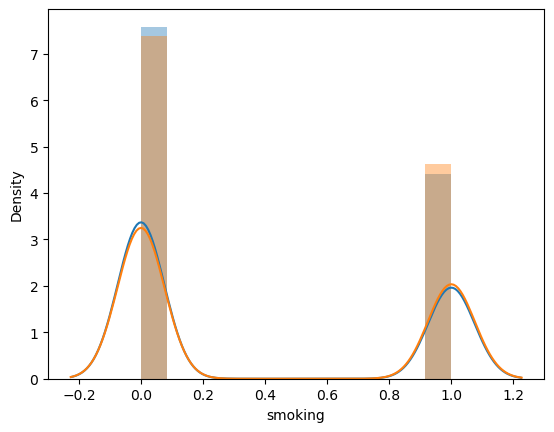

In [47]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_predrf,label = 'predicted')